 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [39]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [40]:
 # Use the Pathlib libary to set the path to the CSV
whale_returns_csv = Path("Resources/whale_returns.csv")

In [41]:
whale_returns_df = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_returns_df.describe(include = "all")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [42]:
# Reading whale returns
whale_returns_df.sort_index(inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [43]:
# Count nulls
print(whale_returns_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [44]:
# Drop nulls
whale_returns_df.dropna(inplace = True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [45]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns_df.sort_index(inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [46]:
# Count nulls
print(algo_returns_df.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [47]:
# Drop nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [48]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp_tsx_history_df.sort_index(inplace = True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [49]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [50]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df

C:\Users\GUILLE~1\AppData\Local\Temp/ipykernel_12792/3056287270.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [51]:
# Calculate Daily Returns
sp_daily_returns = sp_tsx_history_df.astype(float).pct_change()
sp_daily_returns.sort_index()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [52]:
# Drop nulls
sp_daily_returns.dropna(inplace = True)
sp_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [53]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns.rename(columns = {"Close" : "S&P 500"}, inplace = True)
sp_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [54]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp_daily_returns], axis = "columns", join = "inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

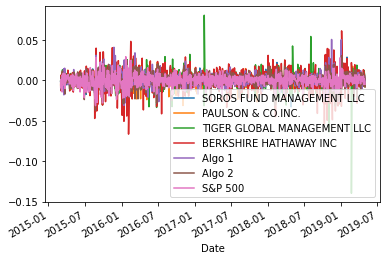

In [55]:
# Plot daily returns of all portfolios
all_returns_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

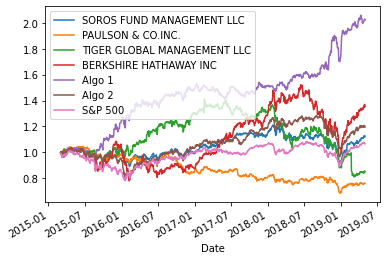

In [56]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (all_returns_df + 1).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

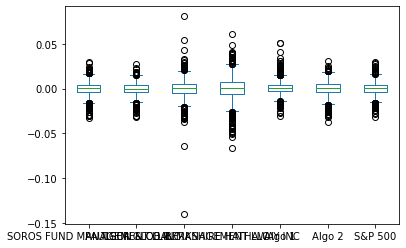

In [57]:
# Box plot to visually show risk
all_returns_df.plot(kind = "box")

### Calculate Standard Deviations

In [58]:
# Calculate the daily standard deviations of all portfolios
all_returns_std = pd.DataFrame(all_returns_df.std()).rename(columns = {0 : "Standard Deviations"})
all_returns_std

,Standard Deviations
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P 500,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [59]:
# Calculate the daily standard deviation of S&P TSX 60
sp_tsx_history_std = all_returns_std.loc["S&P 500", "Standard Deviations"]

# Determine which portfolios are riskier than the S&P TSX 60
risky_std = all_returns_std[all_returns_std["Standard Deviations"] > sp_tsx_history_std]
risky_std

,Standard Deviations
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [60]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_returns_std * np.sqrt(252)
annualized_std

,Standard Deviations
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P 500,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

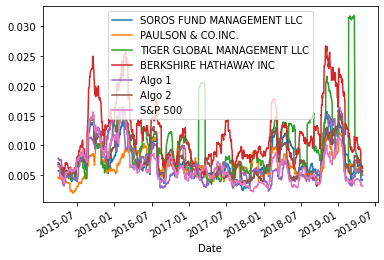

In [61]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling_std = all_returns_df.rolling(window = 21).std()
# Plot the rolling standard deviation
all_rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

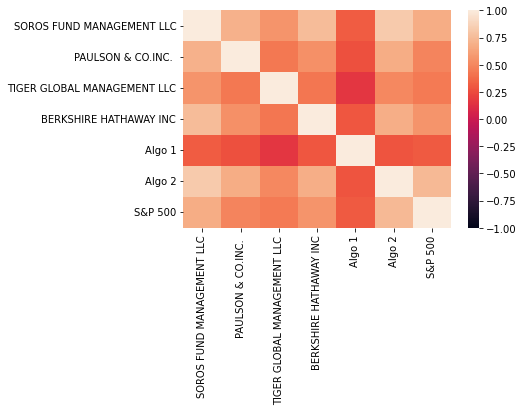

In [64]:
# Calculate the correlation
correlation = pd.DataFrame(all_returns_df.corr())
# Display the correlation matrix
sns.heatmap(correlation, vmin =- 1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

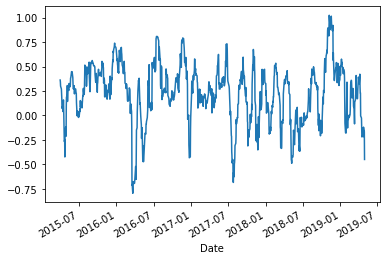

In [78]:
# Calculate covariance of a single portfolio
covariance = all_returns_df["Algo 1"].rolling(window=21).cov(all_returns_df["S&P 500"])
# Calculate variance of S&P TSX
variance = all_returns_df["S&P 500"].rolling(window=21).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

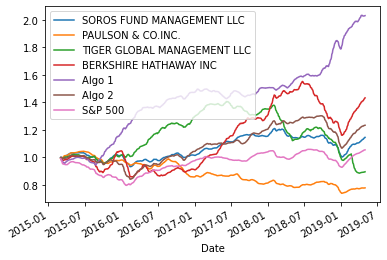

In [82]:
# Use `ewm` to calculate the rolling window
all_returns_ewm = all_returns_df.ewm(span = 21).mean()
(all_returns_ewm + 1).cumprod().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [87]:
# Annualized Sharpe Ratios
sharpe_ratios = all_returns_df.mean() / all_returns_df.std()
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.018061
PAULSON & CO.INC.             -0.034495
TIGER GLOBAL MANAGEMENT LLC   -0.009100
BERKSHIRE HATHAWAY INC         0.029421
Algo 1                         0.093957
Algo 2                         0.024997
S&P 500                        0.012319
dtype: float64

<AxesSubplot:>

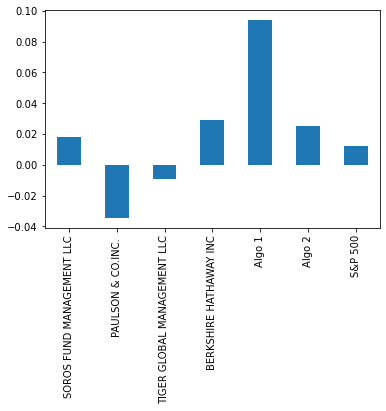

In [88]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

--- Algo 1 has the highest Sharpe Ratio and therefore is superior to the other portfolios as it provides security and less risk. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [99]:
# Reading data from 1st stock
l_historical_csv = Path("Resources/l_historical.csv")
l_historical_df = pd.read_csv(l_historical_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
l_historical_df.sort_index(inplace = True)
l_historical_df.drop("Symbol", axis = 1, inplace = True)
l_historical_df.rename(columns = {"Close" : "L"}, inplace = True)
l_historical_df.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [100]:
# Reading data from 2nd stock
otex_historical_csv = Path("Resources/otex_historical.csv")
otex_historical_df = pd.read_csv(otex_historical_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
otex_historical_df.sort_index(inplace = True)
otex_historical_df.drop("Symbol", axis = 1, inplace = True)
otex_historical_df.rename(columns = {"Close" : "OTEX"}, inplace = True)
otex_historical_df.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [101]:
# Reading data from 3rd stock
shop_historical_csv = Path("Resources/shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
shop_historical_df.sort_index(inplace = True)
shop_historical_df.drop("Symbol", axis = 1, inplace = True)
shop_historical_df.rename(columns = {"Close" : "SHOP"}, inplace = True)
shop_historical_df.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [102]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat((l_historical_df, otex_historical_df, shop_historical_df), axis = 1, join = "inner")
all_stocks.sort_index(inplace = True)
all_stocks

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [103]:
# Reset Date index
all_stocks.index = all_stocks.index.normalize()

In [104]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!